<a href="https://colab.research.google.com/github/ckraju/mits/blob/master/krishnaprabha-sensors.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import files
uploaded = files.upload()

Saving train.csv to train.csv


In [0]:
import pandas as pd


In [0]:
import io

df2 = pd.read_csv(io.BytesIO(uploaded['train.csv']))

# Dataset is now stored in a Pandas Dataframe

In [7]:
# Visualize training history
from keras.models import Sequential
from keras.layers import Dense
import matplotlib.pyplot as plt
import numpy
from keras.utils import to_categorical

Using TensorFlow backend.


In [0]:
# fix random seed for reproducibility
#seed = 5
#numpy.random.seed(seed)
# load pima indians dataset
dataset = numpy.loadtxt("train.csv", delimiter=" ")
# split into input (X) and output (Y) variables
X = dataset[:,0:561]
Y = dataset[:,561]

In [19]:
X

array([[ 0.28858451, -0.02029417, -0.13290514, ..., -0.84124676,
         0.17994061, -0.05862692],
       [ 0.27841883, -0.01641057, -0.12352019, ..., -0.8447876 ,
         0.18028889, -0.05431672],
       [ 0.27965306, -0.01946716, -0.11346169, ..., -0.84893347,
         0.18063731, -0.04911782],
       ...,
       [ 0.27338737, -0.01701062, -0.04502183, ..., -0.77913261,
         0.24914484,  0.04081119],
       [ 0.28965416, -0.01884304, -0.15828059, ..., -0.78518142,
         0.24643223,  0.02533948],
       [ 0.35150347, -0.01242312, -0.20386717, ..., -0.78326693,
         0.24680852,  0.03669484]])

In [20]:
Y

array([5., 5., 5., ..., 2., 2., 2.])

In [11]:
Y.shape

(7352,)

In [12]:
X.shape

(7352, 561)

In [0]:
# create model
model = Sequential()
model.add(Dense(60, input_dim=561, activation='sigmoid'))
model.add(Dense(30, activation='sigmoid'))
model.add(Dense(7, activation='softmax'))

In [22]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 60)                33720     
_________________________________________________________________
dense_5 (Dense)              (None, 30)                1830      
_________________________________________________________________
dense_6 (Dense)              (None, 7)                 217       
Total params: 35,767
Trainable params: 35,767
Non-trainable params: 0
_________________________________________________________________


In [0]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [0]:
from keras.utils import to_categorical

Y_cat = to_categorical(Y)




In [25]:
Y_cat.shape

(7352, 7)

In [27]:
Y_cat

array([[0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       ...,
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.]], dtype=float32)

In [28]:
# Fit the model
history = model.fit(X, Y_cat, validation_split=0.25, epochs=100)
# list all data in history
print(history.history.keys())

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where



Train on 5514 samples, validate on 1838 samples
Epoch 1/100





5514/5514 [==============================] - 1s 184us/step - loss: 1.3617 - acc: 0.4764 - val_loss: 0.9768 - val_acc: 0.6251
Epoch 2/100
5514/5514 [==============================] - 0s 65us/step - loss: 0.7402 - acc: 0.7989 - val_loss: 0.5453 - val_acc: 0.9168
Epoch 3/100
5514/5514 [==============================] - 0s 63us/step - loss: 0.4352 - acc: 0.8896 - val_loss: 0.3364 - val_acc: 0.9407
Epoch 4/100
5514/5514 [==============================] - 0s 63us/step - loss: 0.2897 - acc: 0.9215 - val_loss: 0.2310 - val_acc: 0.9467
Epoch 5/100
5514/5514 [==============================] - 0s 62us/step - loss: 0.2098 - acc: 0.9405 - val_loss: 0.1867 - val_acc: 0.9478
Epoch 6/100
5514/5514 [==============================] - 0s 63us/step - loss: 0.1698 - acc: 0.9476 - val_loss: 0.1685 - val_acc: 0.9440
Epoch 7/100
5514/5514 [==========

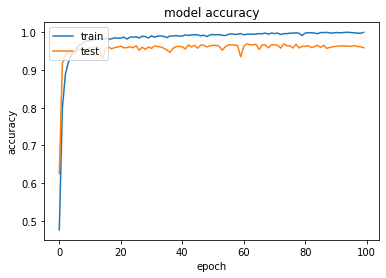

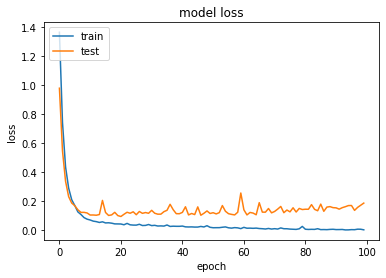

In [29]:
# summarize history for accuracy
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()